In [1]:
import os
import sys

import urllib.request
# from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams.update( mpl.rcParamsDefault ) 

In [2]:
bicis_recorridos_2021_df = pd.read_csv(
    '../sets/compressed/recorridos-realizados-2021.zip',
    compression = 'zip',
    encoding = 'utf-8', 
)

No handles with labels found to put in legend.


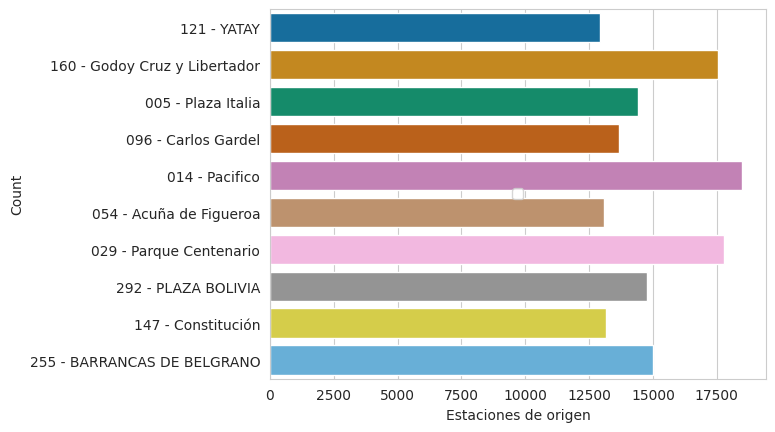

In [3]:
top_10 = bicis_recorridos_2021_df['Nombre de estación de inicio'].value_counts()[:10]
top_10.index

subset = bicis_recorridos_2021_df[ bicis_recorridos_2021_df['Nombre de estación de inicio'].isin(top_10.index) ]
sns.set_style('whitegrid')
ax = sns.countplot( 
    y='Nombre de estación de inicio',
    data = subset,
    palette = 'colorblind'
)
ax.legend(loc=10)
plt.xlabel("Estaciones de origen")
plt.ylabel("Count")
plt.show() 

In [5]:
bicis_recorridos_2021_df.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE


In [9]:
bicis_recorridos_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328726 entries, 0 to 1328725
Data columns (total 13 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   ID                                  1328726 non-null  int64  
 1   Estado cerrado                      1328726 non-null  object 
 2   Duración                            1328726 non-null  int64  
 3   Id de estación de inicio            1328726 non-null  int64  
 4   Fecha de inicio                     1328726 non-null  object 
 5   Nombre de estación de inicio        1328726 non-null  object 
 6   Fecha de fin                        1328726 non-null  object 
 7   Id de estación de fin de viaje      1328723 non-null  float64
 8   Nombre de estación de fin de viaje  1328723 non-null  object 
 9   ID de ciclista                      1328726 non-null  int64  
 10  Tipo de ciclista                    1328726 non-null  object 
 11  Modelo de b

In [4]:
bicis_recorridos_2021_df['Fecha de inicio']
formato = '%Y%m%d %H:%M:%S'
bicis_recorridos_2021_df['start datetime'] = pd.to_datetime(
    bicis_recorridos_2021_df['Fecha de inicio'], 
    format = formato
)
bicis_recorridos_2021_df['START DATE'] = bicis_recorridos_2021_df['start datetime'].dt.strftime('%Y-%m-%d')
bicis_recorridos_2021_df['MES']  = bicis_recorridos_2021_df['start datetime'].dt.strftime('%B')
bicis_recorridos_2021_df['DIA']  = bicis_recorridos_2021_df['start datetime'].dt.strftime('%A')
bicis_recorridos_2021_df['TIME'] = bicis_recorridos_2021_df['start datetime'].dt.strftime('%H:%M')

In [25]:
bicis_recorridos_2021_df.head()

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje,start datetime,START DATE,MES,DIA,TIME
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,MEMBER,ICONIC,CODE,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,MEMBER,ICONIC,CODE,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,MEMBER,ICONIC,CODE,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,MEMBER,ICONIC,CODE,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09


In [13]:
#bicis_recorridos_2021_df['Nombre de estación de inicio']['']
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
my_output = pysqldf("""SELECT * FROM  bicis_recorridos_2021_df WHERE 'Id de estación de inicio' = '38' LIMIT 10""")
 


In [17]:
bicis_recorridos_2021_df[bicis_recorridos_2021_df['Nombre de estación de inicio'] == '278 - Donato Alvarez']

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,Tipo de ciclista,Modelo de bicicleta,Origen de viaje,start datetime,START DATE,MES,DIA,TIME
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,MEMBER,ICONIC,CODE,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11
290,11204462,NORMAL,1383,387,2021-06-02 15:34:12,278 - Donato Alvarez,2021-06-02 15:57:15,215.0,113 - Guatemala,743315,MEMBER,ICONIC,CODE,2021-06-02 15:34:12,2021-06-02,June,Wednesday,15:34
603,11204055,NORMAL,613,387,2021-06-02 14:55:02,278 - Donato Alvarez,2021-06-02 15:05:15,104.0,104 - Federico Lacroze,567011,MEMBER,ICONIC,CODE,2021-06-02 14:55:02,2021-06-02,June,Wednesday,14:55
1315,11203127,NORMAL,610,387,2021-06-02 13:29:26,278 - Donato Alvarez,2021-06-02 13:39:36,104.0,104 - Federico Lacroze,96916,MEMBER,ICONIC,CODE,2021-06-02 13:29:26,2021-06-02,June,Wednesday,13:29
1730,11202575,NORMAL,1260,387,2021-06-02 12:37:07,278 - Donato Alvarez,2021-06-02 12:58:07,20.0,020 - Distrito Audiovisual,109059,MEMBER,ICONIC,CODE,2021-06-02 12:37:07,2021-06-02,June,Wednesday,12:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328191,9646933,NORMAL,1922,387,2021-01-01 02:15:59,278 - Donato Alvarez,2021-01-01 02:48:01,214.0,142 - Armenia y Gorriti,435266,MEMBER,ICONIC,CODE,2021-01-01 02:15:59,2021-01-01,January,Friday,02:15
1328244,9646880,NORMAL,971,387,2021-01-01 02:05:31,278 - Donato Alvarez,2021-01-01 02:21:42,269.0,260 - SAN MIGUEL DE GARICOITS,214952,MEMBER,ICONIC,CODE,2021-01-01 02:05:31,2021-01-01,January,Friday,02:05
1328414,9646710,NORMAL,649,387,2021-01-01 01:30:51,278 - Donato Alvarez,2021-01-01 01:41:40,167.0,275 - PLAZA 24 DE SEPTIEMBRE,717528,MEMBER,ICONIC,CODE,2021-01-01 01:30:51,2021-01-01,January,Friday,01:30
1328580,9646544,NORMAL,1697,387,2021-01-01 00:58:08,278 - Donato Alvarez,2021-01-01 01:26:25,96.0,096 - Carlos Gardel,716759,MEMBER,ICONIC,CODE,2021-01-01 00:58:08,2021-01-01,January,Friday,00:58


### Agrego datos del clima

In [5]:
weather_data_df = pd.read_csv('../sets/weather-data-ba.csv')
filtered_weather_df = weather_data_df.filter(['DATE','PRCP','TAVG'])

In [6]:
merged_inner = pd.merge(left=bicis_recorridos_2021_df, right=filtered_weather_df, left_on='START DATE', right_on='DATE')

In [41]:
merged_inner[merged_inner['PRCP'] != np.nan]

,ID,Estado cerrado,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista,...,Modelo de bicicleta,Origen de viaje,start datetime,START DATE,MES,DIA,TIME,DATE,PRCP,TAVG
0,11204995,NORMAL,437,131,2021-06-02 16:14:35,131- HOSPITAL DE CLÍNICAS,2021-06-02 16:21:52,38.0,038 - Plaza Libertad,119795,...,ICONIC,CODE,2021-06-02 16:14:35,2021-06-02,June,Wednesday,16:14,2021-06-02,0.0,14.6
1,11204938,NORMAL,406,387,2021-06-02 16:11:01,278 - Donato Alvarez,2021-06-02 16:17:47,262.0,349 - Plaza Saenz Peña,348428,...,ICONIC,CODE,2021-06-02 16:11:01,2021-06-02,June,Wednesday,16:11,2021-06-02,0.0,14.6
2,11204928,NORMAL,299,232,2021-06-02 16:10:08,252 - Tamborini,2021-06-02 16:15:07,386.0,277 - Coghlan,690073,...,ICONIC,CODE,2021-06-02 16:10:08,2021-06-02,June,Wednesday,16:10,2021-06-02,0.0,14.6
3,11204920,NORMAL,400,117,2021-06-02 16:09:34,117 - HUMBERTO 1°,2021-06-02 16:16:14,175.0,147 - Constitución,713938,...,ICONIC,CODE,2021-06-02 16:09:34,2021-06-02,June,Wednesday,16:09,2021-06-02,0.0,14.6
4,11204919,NORMAL,591,212,2021-06-02 16:09:32,129 - Velasco,2021-06-02 16:19:23,158.0,158 - VILLARROEL,35926,...,ICONIC,CODE,2021-06-02 16:09:32,2021-06-02,June,Wednesday,16:09,2021-06-02,0.0,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307713,9646396,NORMAL,690,277,2021-01-01 00:09:43,292 - PLAZA BOLIVIA,2021-01-01 00:21:13,44.0,044 - Ecoparque,62246,...,ICONIC,CODE,2021-01-01 00:09:43,2021-01-01,January,Friday,00:09,2021-01-01,NaN,25.3
1307714,9646395,NORMAL,1360,79,2021-01-01 00:08:40,079 - AZUCENA VILLAFLOR,2021-01-01 00:31:20,168.0,168 - Estados Unidos,445201,...,ICONIC,CODE,2021-01-01 00:08:40,2021-01-01,January,Friday,00:08,2021-01-01,NaN,25.3
1307715,9646394,NORMAL,1169,79,2021-01-01 00:08:37,079 - AZUCENA VILLAFLOR,2021-01-01 00:28:06,8.0,008 - Congreso,554162,...,ICONIC,CODE,2021-01-01 00:08:37,2021-01-01,January,Friday,00:08,2021-01-01,NaN,25.3
1307716,9646393,NORMAL,1031,79,2021-01-01 00:06:50,079 - AZUCENA VILLAFLOR,2021-01-01 00:24:01,75.0,075 - Plaza Primero de Mayo,51005,...,ICONIC,CODE,2021-01-01 00:06:50,2021-01-01,January,Friday,00:06,2021-01-01,NaN,25.3


In [42]:
 merged_inner['PRCP'] = merged_inner['PRCP'].replace(np.nan, 0)

In [43]:
merged_inner.isnull().sum(axis=0)

ID                                    0
Estado cerrado                        0
Duración                              0
Id de estación de inicio              0
Fecha de inicio                       0
Nombre de estación de inicio          0
Fecha de fin                          0
Id de estación de fin de viaje        3
Nombre de estación de fin de viaje    3
ID de ciclista                        0
Tipo de ciclista                      0
Modelo de bicicleta                   0
Origen de viaje                       0
start datetime                        0
START DATE                            0
MES                                   0
DIA                                   0
TIME                                  0
DATE                                  0
PRCP                                  0
TAVG                                  0
dtype: int64

In [44]:
corr = merged_inner[['Duración','PRCP', 'TAVG', 'Id de estación de inicio']].corr()

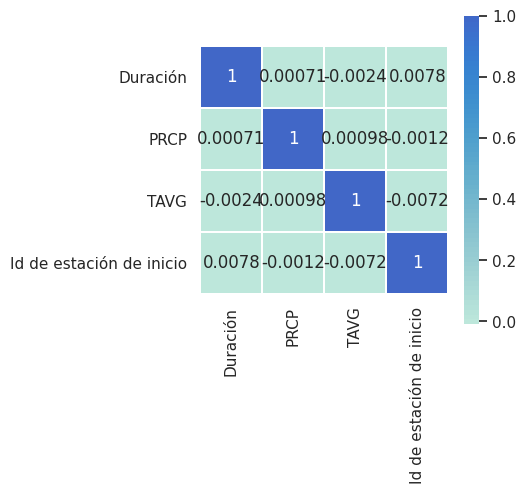

In [45]:
f,axes = plt.subplots(1,1,figsize = (4,4))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 2,ax = axes)
plt.show()